In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Pre processing :

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [8]:
df['Annual Income (k$)'].value_counts()

Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

In [9]:
df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

## EDA :

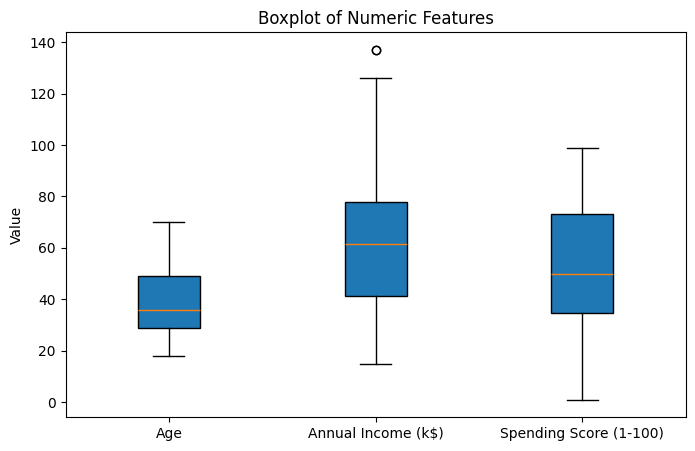

In [13]:
df = df.drop(['CustomerID'], axis=1)
numerical=df.select_dtypes(include='number')
plt.figure(figsize=(8, 5))

plt.boxplot(numerical.values, patch_artist=True, labels=numerical.columns)
plt.title("Boxplot of Numeric Features")
plt.ylabel('Value')
plt.show()

In [14]:
df = df.drop(['Age'], axis=1)
df.sample(5)

,Genre,Annual Income (k$),Spending Score (1-100)
1,Male,15,81
116,Female,65,43
135,Female,73,88
165,Female,85,75
75,Male,54,54


In [15]:
numeric_columns = [ 'Annual Income (k$)', 'Spending Score (1-100)']

X = df[numeric_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K Means :

In [18]:
# --- K-Means Class Implemented From Scratch ---
class KMeansScratch:

    def __init__(self, n_clusters=5, max_iter=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None

    def euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2)**2))

    def fit_predict(self, X):
        """
            X (np.ndarray): The input data to cluster, shape (n_samples, n_features).
        Returns:
            np.ndarray: An array of cluster labels for each data point.
        """
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        # 1. Initialize centroids by randomly selecting K points from the data
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        # Main optimization loop
        for i in range(self.max_iter):
            labels = np.zeros(n_samples)   # 2. Assignment Step: Assign samples to the closest centroid

            for sample_idx, sample in enumerate(X):
                distances = [self.euclidean_distance(sample, centroid) for centroid in self.centroids]
                labels[sample_idx] = np.argmin(distances)

            # Store the current centroids to check for convergence
            old_centroids = self.centroids.copy()

            # 3. Update Step: Recalculate centroids as the mean of assigned samples
            for cluster_idx in range(self.n_clusters):
                points_in_cluster = X[labels == cluster_idx]  # Get all samples assigned to this cluster
                
                if len(points_in_cluster) > 0:
                    self.centroids[cluster_idx] = np.mean(points_in_cluster, axis=0)

            # 4. Convergence Check: If centroids haven't changed, stop
            centroid_shift = np.sum([self.euclidean_distance(old_centroids[j], self.centroids[j]) for j in range(self.n_clusters)])
            if centroid_shift == 0:
                print(f"Algorithm converged after {i+1} iterations.")
                break
        
        return labels.astype(int)


In [19]:
for k in range(2, 11):
    kmeans = KMeansScratch(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    print(f"For k={k}",silhouette_score(X_scaled, labels))  
    print('\n')


Algorithm converged after 9 iterations.
For k=2 0.2932903073400333


Algorithm converged after 15 iterations.
For k=3 0.46658474419000145


Algorithm converged after 7 iterations.
For k=4 0.4081809813145816


Algorithm converged after 11 iterations.
For k=5 0.5539423799434205


Algorithm converged after 5 iterations.
For k=6 0.5368598077994036


Algorithm converged after 10 iterations.
For k=7 0.45330780734351245


Algorithm converged after 8 iterations.
For k=8 0.4379579488201524


Algorithm converged after 12 iterations.
For k=9 0.4251272034538288


Algorithm converged after 11 iterations.
For k=10 0.40594937840498985




Algorithm converged after 11 iterations.


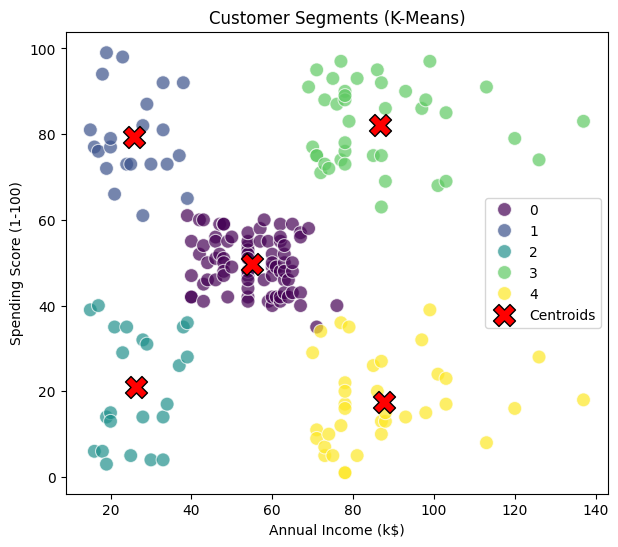

In [20]:
# --- Applying the Scratch Implementation ---

# 1. Instantiate and run the custom K-Means model
kmeans = KMeansScratch(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 2. Visualize the clustering results
plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.7
)

# Plot the final centroids
centroids_df = pd.DataFrame(scaler.inverse_transform(kmeans.centroids), columns=numeric_columns)

plt.scatter(
    centroids_df['Annual Income (k$)'],
    centroids_df['Spending Score (1-100)'],
    marker='X',
    s=250,
    c='red',
    edgecolor='black',
    label='Centroids'
)
plt.title("Customer Segments (K-Means)")
plt.legend()
plt.show()


In [21]:
# 3. Analyze the cluster profiles
cluster_profile = df.groupby('Cluster')[numeric_columns].mean()
print("\nCluster Profiles (K Means) :")
cluster_profile


Cluster Profiles (K Means) :


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.087500,49.712500
1,25.727273,79.363636
2,26.304348,20.913043
3,86.538462,82.128205
4,87.750000,17.583333


## Hierarchical Clustering :

In [22]:
class HierarchicalClusteringScratch:
    def __init__(self, n_clusters=5, linkage='ward'):
        """
            n_clusters (int): The number of clusters to find.
            linkage (str): The linkage criterion to use. Currently only 'ward' is supported.
        """
        self.n_clusters = n_clusters
        if linkage != 'ward':
            raise ValueError("Currently, only 'ward' linkage is implemented.")
        self.linkage = linkage

    def ward_linkage_distance(self, cluster1_points, cluster2_points):
        """
        Calculates the Ward's linkage distance between two clusters.
        This is the increase in variance upon merging the two clusters.
        """
        n1 = cluster1_points.shape[0]
        n2 = cluster2_points.shape[0]
        
        # Calculate centroids of the two clusters
        centroid1 = np.mean(cluster1_points, axis=0)
        centroid2 = np.mean(cluster2_points, axis=0)
        
        # Calculate the squared Euclidean distance between centroids
        centroid_dist_sq = np.sum((centroid1 - centroid2)**2)
        
        # Ward's linkage formula
        increase_in_variance = (n1 * n2 / (n1 + n2)) * centroid_dist_sq
        return increase_in_variance

    def fit_predict(self, X):
        """
        Fits the model and returns the cluster labels.
        Args:
            X (np.ndarray): The input data, shape (n_samples, n_features).
        Returns:
            np.ndarray: An array of cluster labels for each data point.
        """
        n_samples = X.shape[0]
        
        # 1. Start with each sample as its own cluster, storing original indices
        clusters = [[i] for i in range(n_samples)]

        # 2. Iteratively merge clusters until the desired number is reached
        while len(clusters) > self.n_clusters:
            min_distance = float('inf')
            clusters_to_merge = (-1, -1)
            
            # Find the two closest clusters
            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    # Get the actual data points for each cluster using their indices
                    cluster1_points = X[clusters[i]]
                    cluster2_points = X[clusters[j]]
                    
                    # Calculate distance based on linkage criterion
                    dist = self.ward_linkage_distance(cluster1_points, cluster2_points)
                    
                    if dist < min_distance:
                        min_distance = dist
                        clusters_to_merge = (i, j)

            # 3. Merge the two closest clusters
            idx1, idx2 = clusters_to_merge
            
            # Ensure we pop the larger index first to avoid shifting issues
            if idx1 > idx2:
                idx1, idx2 = idx2, idx1
            
            merged_indices = clusters[idx1] + clusters[idx2]
            clusters.pop(idx2)
            clusters.pop(idx1)
            clusters.append(merged_indices)

        # 4. Assign final labels
        labels = np.zeros(n_samples, dtype=int)
        for cluster_id, cluster_indices in enumerate(clusters):
            for point_index in cluster_indices:
                labels[point_index] = cluster_id
        
        return labels

Running Hierarchical Clustering ....


Clustering complete.


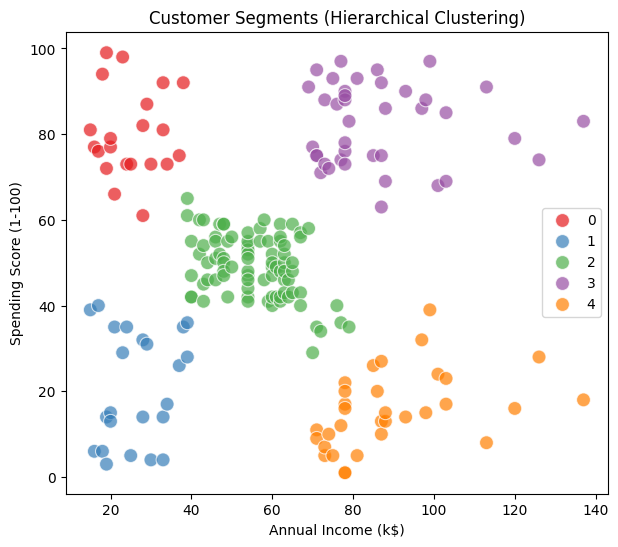

In [23]:
# --- Applying the Scratch Implementation ---

# 1. Instantiate and run the custom Hierarchical Clustering model
print("Running Hierarchical Clustering ....")
hc_scratch = HierarchicalClusteringScratch(n_clusters=5, linkage='ward')

df['HC_Cluster'] = hc_scratch.fit_predict(X_scaled)
print("Clustering complete.")

# 2. Visualize the clustering results
plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='HC_Cluster',
    palette='Set1',
    s=100,
    alpha=0.7
)
plt.title("Customer Segments (Hierarchical Clustering)")
plt.legend()
plt.show()


In [24]:
# 3. Analyze the cluster profiles
hc_profile = df.groupby('HC_Cluster')[numeric_columns].mean()
print("\nCluster Profiles (Hierarchical Clustering):")
hc_profile


Cluster Profiles (Hierarchical Clustering):


,Annual Income (k$),Spending Score (1-100)
HC_Cluster,,
0,25.095238,80.047619
1,26.304348,20.913043
2,55.811765,49.129412
3,86.538462,82.128205
4,89.406250,15.593750


Generating the dendrogram ....


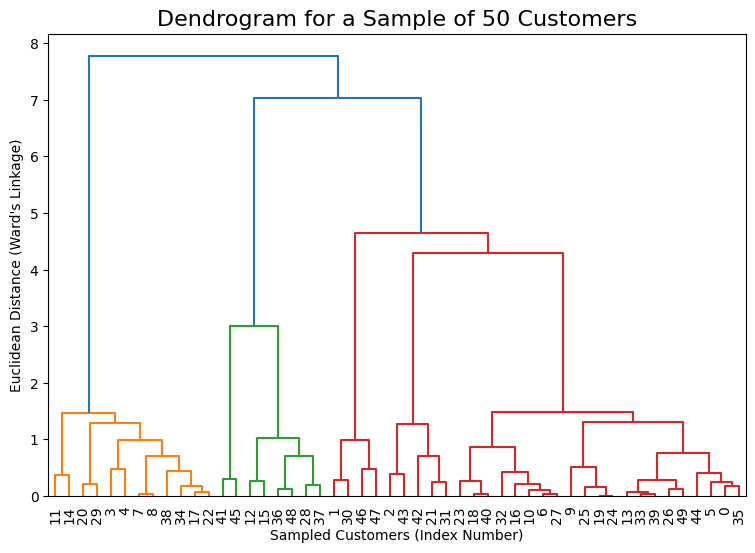

In [25]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

# --- Dendrogram Generation on a Reduced Dataset ---

# Set a seed for reproducibility
np.random.seed(42)

# Take a random sample of 50 data points for a clearer dendrogram
sample_size = 50
sample_indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_sampled = X_scaled[sample_indices]

print(f"Generating the dendrogram ....")

# Set up the plot
plt.figure(figsize=(9, 6))

# Calculate the linkage matrix on the SAMPLED data
linkage_matrix_sampled = sch.linkage(X_sampled, method='ward')

# Plot the dendrogram
dendrogram = sch.dendrogram(
    linkage_matrix_sampled,
    leaf_font_size=10  # Adjust font size for readability
)

plt.title(f"Dendrogram for a Sample of {sample_size} Customers", fontsize=16)
plt.xlabel("Sampled Customers (Index Number)")
plt.ylabel("Euclidean Distance (Ward's Linkage)")
plt.show()